<a href="https://colab.research.google.com/github/elreweidy/PyTorch_playground/blob/main/FeedForward_ANN_With_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**importing starting libs**



In [34]:
import torch 
import torch.nn as nn 
import numpy as np 
import matplotlib.pyplot as plt 
import torchvision.datasets as dset
import torchvision.transforms as transforms

**downloading the MNIST dataset**

In [35]:
train_dataset = dset.MNIST(root = ".",train = True, transform = transforms.ToTensor(), download=True)

**showing some data samples**

In [36]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [37]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

**showing the targets**

In [38]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

**downloading the test dataset object (already downloaded with the training data)**

In [39]:
test_dataset = dset.MNIST(root = ".", train = False, download=True, transform=transforms.ToTensor())
test_dataset.data.shape

torch.Size([10000, 28, 28])

**building and Training the model**

In [40]:
#building the model sequentially 
model = nn.Sequential(
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
)

**creating the loss and optimizer objects**

In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [42]:
# creating the DataLoader objects to make it easier by creating batchs automatically.
# and aslo to shuffle the data
batch_size = 128 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)



In [43]:
# training the model 
epochs = 10 

train_losses = np.zeros(epochs)
test_losses = np.zeros(epochs)

for e in range(epochs):
  train_loss = []
  for inputs, targets in train_loader:
    inputs = inputs.view(-1, 784)
    optimizer.zero_grad()

    output = model(inputs)
    loss = criterion(output, targets)

    loss.backward()
    optimizer.step()


    train_loss.append(loss.item())
    
  train_loss = np.mean(train_loss)


  test_loss = []
  for inputs, targets in test_loader:

    inputs = inputs.view(-1, 784)
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    test_loss.append(loss.item())
  test_loss = np.mean(test_loss)

  #saving the train and test loss for each epoch
  train_losses[e] = train_loss
  test_losses[e] = test_loss


  print(f'Epoch {e+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch 1/10, Train Loss: 0.4127, Test Loss: 0.2253
Epoch 2/10, Train Loss: 0.1926, Test Loss: 0.1633
Epoch 3/10, Train Loss: 0.1411, Test Loss: 0.1278
Epoch 4/10, Train Loss: 0.1101, Test Loss: 0.1034
Epoch 5/10, Train Loss: 0.0890, Test Loss: 0.0933
Epoch 6/10, Train Loss: 0.0739, Test Loss: 0.0874
Epoch 7/10, Train Loss: 0.0626, Test Loss: 0.0856
Epoch 8/10, Train Loss: 0.0527, Test Loss: 0.0789
Epoch 9/10, Train Loss: 0.0447, Test Loss: 0.0792
Epoch 10/10, Train Loss: 0.0394, Test Loss: 0.0718


**visualizing the loss per epoch** 

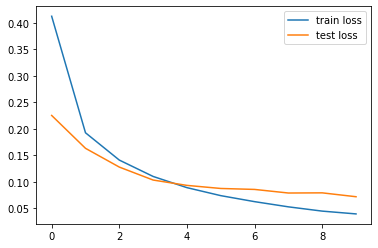

In [44]:
plt.plot(train_losses, label= "train loss")
plt.plot(test_losses, label= "test loss")
plt.legend()
plt.show()

**evaluting the model performance**

In [46]:
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
  # move data to GPU

  # reshape the input
  inputs = inputs.view(-1, 784)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
  # move data to GPU

  # reshape the input
  inputs = inputs.view(-1, 784)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9920, Test acc: 0.9782
